# Veri Görselleştirme 2

In [1]:
import seaborn as sns

In [2]:
data = sns.load_dataset('planets')

Seaborn Kütüphanesinden 'Planets' veri setini çekiyoruz ve datamıza atıyoruz.

In [3]:
df = data.copy()

Data üstünde oynama yapıp veri kaybından kaçınmak için df adlı değişkene datamızı kopyalıyoruz.

In [8]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [6]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


Veri setimiz hakkındaki bilgilere bakıyoruz. Kolonlarımızdaki özellikler nelerdir, eksik değerler var mı ve verilerimizin tipi nelerdir gibi sorulara cevap alıyoruz.

In [10]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [11]:
import pandas as pd

In [13]:
df['method'] = pd.Categorical(df.method)

'Method' özelliğini kategorik veriye çeviriyoruz ve altta tekrar veri tiplerini kontrol ediyoruz.

In [16]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [17]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [19]:
df.shape

(1035, 6)

In [21]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [22]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


describe() methodu verilerimizde hızlı ve basit şekilde analiz yapabilmemiz için verilerin std , mean , max , min ve count gibi değerlerini hesaplayıp gösterir. Ayrıca tablonun okunabilirliğini arttırmak için alttaki gibi
describe().T yaparak tablonun transpozunu alabiliriz.

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [24]:
df.describe(include=['category'])

,method
count,1035
unique,10
top,Radial Velocity
freq,553


Kategorik veriler hakkındaki bilgilere erişiyoruz.

In [26]:
df.isna().values.any()

True

Veri setimizde herhangi bir boş değer olup olmadığının kontrolünü sağlıyoruz.

In [27]:
df.isna().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

Hangi başlıklarda ne kadar eksik değer olduğunu yazdırıyoruz.

In [28]:
df['mass'].fillna(df.mass.mean(), inplace=True)

Veri setimizdeki 'mass' başlığı altındaki verileri dolduracağız fakat 0 ile doldurursak veri setinin ortalaması standart sapması gibi değerlerde istemediğimiz değişiklikler olacağından boş değerlere 'mass' değerlerinin ortalaması ile dolduruyoruz bu sayede veri setimizin değerlerinde istemedeğimiz sapmalar olmayacak.

In [29]:
df.isna().sum()

method              0
number              0
orbital_period     43
mass                0
distance          227
year                0
dtype: int64

In [30]:
df.fillna(df.mean(), inplace=True)

<ipython-input-30-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [31]:
df.isna().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [32]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [33]:
kat_df = df.select_dtypes(include=['category'])

Kategorik verileri kat_df isimli değişkinimize atıyoruz.

In [34]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [38]:
kat_df.method.unique()

['Radial Velocity', 'Imaging', 'Eclipse Timing Variations', 'Transit', 'Astrometry', 'Transit Timing Variations', 'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing', 'Pulsation Timing Variations']
Categories (10, object): ['Astrometry', 'Eclipse Timing Variations', 'Imaging', 'Microlensing', ...,
                          'Pulsation Timing Variations', 'Radial Velocity', 'Transit',
                          'Transit Timing Variations']

unique() fonksiyonu ile 'method' başlığı altındaki bir birinden farklı unique özel, benzersiz değerleri inceliyoruz.

In [39]:
kat_df.method.nunique()

10

number unique() kaç tane farklı değerin olduğuna bakıyoruz.

In [40]:
kat_df.method.value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

Hangi benzersiz değerden kaç tane olduğunu inceliyoruz.

<Axes: >

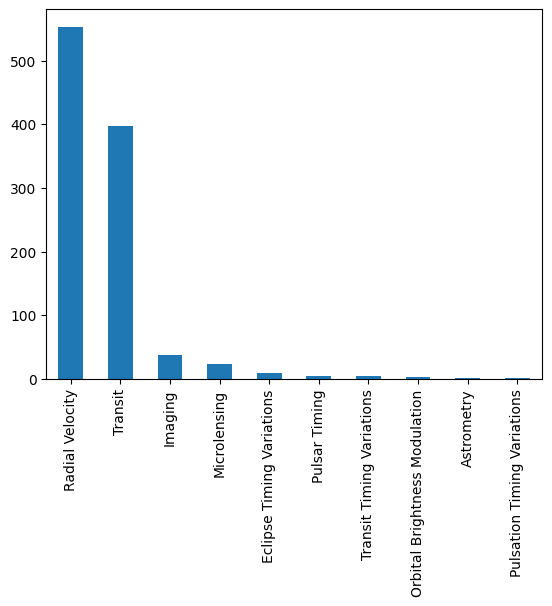

In [42]:
df['method'].value_counts().plot.bar()

Ve sonunda bu değerleri bar grafiği ile görselleştiriyoruz.

<Axes: >

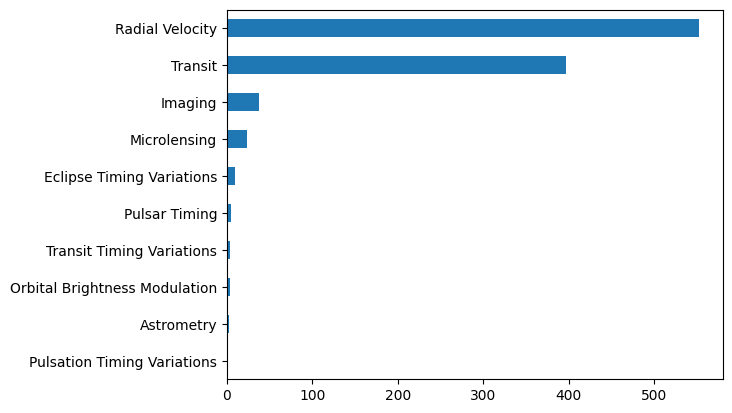

In [44]:
df['method'].value_counts().sort_values().plot.barh()

Başlıkların okunabilirliğini arttırmak amacı ile bar grafiğini yatay hale getiriyoruz. bar-Horizontal

# Elmas Veri Seti İncelemesi

Veri setimizi çekiyoruz ve birkaç inceleme yapıyoruz.

In [45]:
elmaslar = sns.load_dataset('diamonds')
data = elmaslar.copy()
elmaslar.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [47]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [48]:
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [49]:
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [50]:
from pandas.api.types import CategoricalDtype

In [51]:
data.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [53]:
data.cut = data.cut.astype(CategoricalDtype(ordered=True))

Burada kategorik bir sıralama yaptırıyoruz.

In [54]:
data.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

Yapılan sıralamadan memnun kalmadığımız için altta tanımladığımız cut_category'deki sıralamaya göre sıralıyoruz.

In [59]:
cut_category = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [60]:
data.cut = data.cut.astype(CategoricalDtype(categories=cut_category, ordered=True))

Bunun içinde categories parametresine cut_category'i veriyoruz.

In [61]:
data.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

Artık istediğimiz gibi sıralı

Text(0.5, 1.0, 'Cut Sutunu')

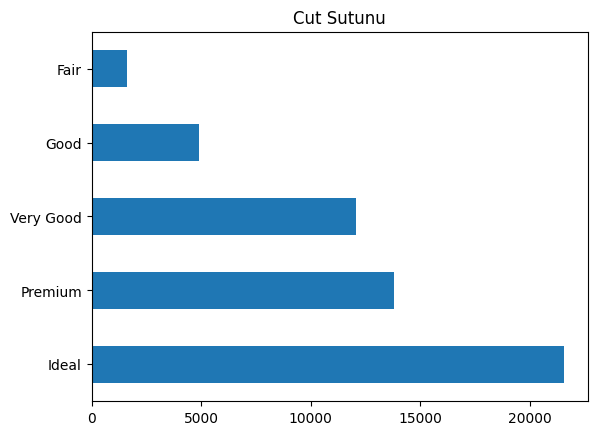

In [62]:
data["cut"].value_counts().plot.barh().set_title("Cut Sutunu")

Burada datamızın cut sütünundaki değerleri sayısal çokluğuna göre sıralayıp yatay barlar ile görselleştiriyoruz ayrıca grafiğimize başlıkta atıyoruz.

<Axes: xlabel='cut', ylabel='None'>

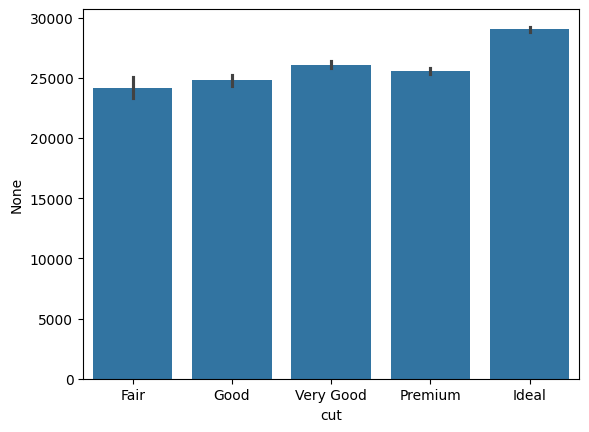

In [63]:
sns.barplot(x='cut', y=data.cut.index, data=data)

Seaborn kütüphanesi ile görselleştirme yapıyoruz x eksenine 'cut' categorisini veriyoruz y eksenine ise  data.cut.index ifadesi, data'nın indekslerini ifade eder. Yani, her bir çubuğun yüksekliği, her bir indeksteki (satırdaki) veri öğesinin frekansını temsil ediyor.

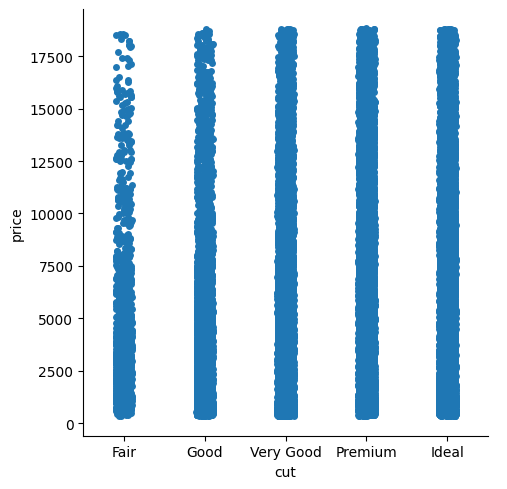

In [64]:
sns.catplot(x='cut', y='price', data=data)

Cat(Categoric) plot ile görselleştiriyoruz fakat artık y değerlerimiz 'price' yani fiyat değerleridir.Catplot() kategorik değişkenlerin dağılımını, ilişkilerini veya gruplar arasındaki farklılıkları kolayca göstermek için kullanılır.

<Axes: xlabel='cut', ylabel='price'>

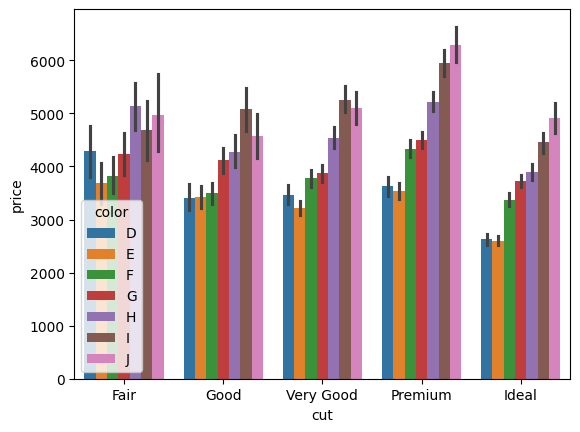

In [65]:
sns.barplot(x='cut', y='price', hue='color', data=data)

Tekrardan barplot() yapıyoruz fakat bu sefer bir hue parametresi eklendi bunu kullanarak kategorik verilerimizin 'color' değerlerine göre değişimini inceleyebiliriz.

In [67]:
data.groupby(['cut', 'color'])['price'].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

Yukarıdaki grafiğin bir nevi görselleştirmemiş halini yazıyoruz.


<ipython-input-77-b1dfec16fd52>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price,kde=True)


<Axes: xlabel='price', ylabel='Density'>

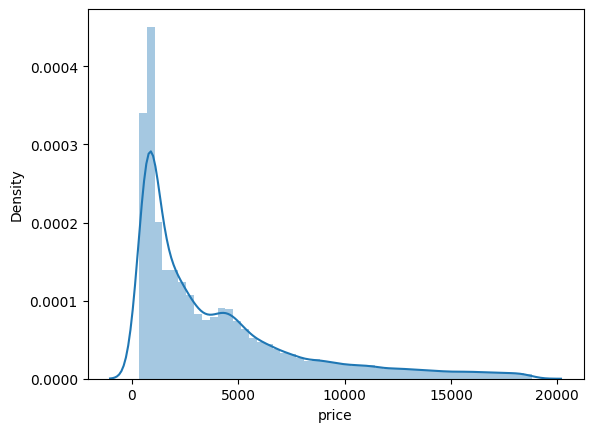

In [77]:
sns.distplot(data.price,kde=True)

distplot(), veri setinin dağılımını histogram ve çekirdek yoğunluk tahminleriyle birlikte gösterir. Ayrıca, opsiyonel olarak, verinin çeyreklerini gösteren kutu grafikleri de ekleyebilir. distplot, verinin genel dağılımını hızlı bir şekilde görselleştirmek için sıklıkla kullanılır ve veri keşfi (exploratory data analysis) aşamasında çok yararlıdır.

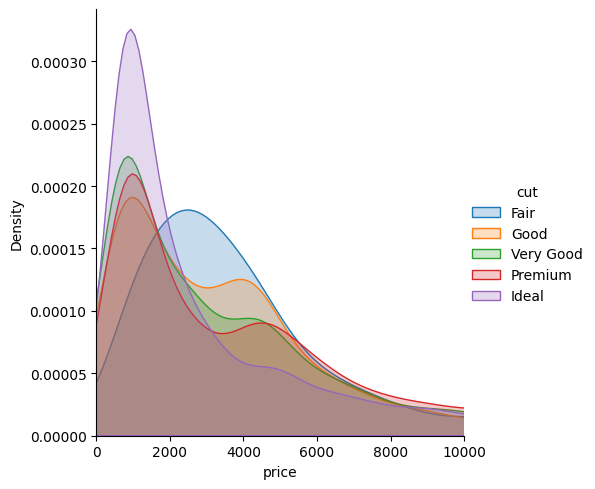

In [85]:
((sns.FacetGrid(data, hue='cut', height=5, xlim=(0, 10000))).map(sns.kdeplot,'price',fill=True).add_legend())

FacetGrid veri setini farklı alt gruplara bölerek bu alt gruplara özgü görselleştirmeler oluşturmanıza olanak tanıyan bir sınıftır. Bu sınıf, genellikle kategorik değişkenlere göre veri setini alt gruplara ayırarak bu alt gruplara ait grafikleri tek bir çatı altında toplamanızı sağlar.

Burada FacetGride datamızı veriyoruz ve hue değerine 'cut' kategorilerimizi veriyoruz, height yani grafiğin yüksekliğini belirtiyoruz, xlim değeri x ekseninin limitlerini belirlemimize yarıyoruz 0 ila 10000 arasında değer verdik. Map ifadesi, her bir alt grup için price sütununun yoğunluk tahminlerini (KDE plot) oluşturur. fill=True parametresi, KDE plotun altında alan dolgusu yapılmasını sağlar.add_legend() metodu, grafiğe bir tablo ekler, bu tablo, hangi renklerin hangi kesim kalitesini temsil ettiğini gösterir.
